In [105]:
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

In [34]:
df = pd.read_csv("data/trips_2016_0117_0123.csv")

In [98]:
df.head()

,taxi_id,trip_start,trip_end,trip_seconds,trip_miles,trip_total,b_date,hour_of_day
0,7474,2016-01-21 20:15:00,2016-01-21 20:15:00,480.0,0.0,8.00,2016-01-21,20
1,1326,2016-01-18 14:15:00,2016-01-18 14:15:00,60.0,0.0,6.00,2016-01-18,14
2,4412,2016-01-18 12:15:00,2016-01-18 12:15:00,0.0,0.0,21.50,2016-01-18,12
3,2876,2016-01-19 10:15:00,2016-01-19 10:15:00,480.0,3.4,15.50,2016-01-19,10
4,8602,2016-01-23 00:45:00,2016-01-23 01:00:00,540.0,2.1,8.75,2016-01-23,0


In [36]:
df.trip_start = pd.to_datetime(df.trip_start)
df.trip_end = pd.to_datetime(df.trip_end)

In [37]:
df['b_date'] = df.trip_start.dt.date

In [64]:
df['hour_of_day'] = df.trip_start.dt.hour

In [52]:
df_agg = pd.DataFrame(df[['taxi_id', 'b_date', 'trip_total']].groupby(by=['taxi_id', 'b_date']).sum())

In [58]:
df_agg.index.values[0]

(1, datetime.date(2016, 1, 17))

In [84]:
temp = df['trip_start'][(df.taxi_id == 8769) & (df.b_date == datetime.date(2016, 1, 22))].dt.hour##.nunique()
temp

26287     16
44490     18
52339     15
74438     23
100024    22
100169    19
130698    17
155281    19
171655    19
179828    18
195712    15
230842    17
251020    23
257229    15
272496    16
303813    23
317613    19
317674    18
318190    17
Name: trip_start, dtype: int64

In [86]:
print(temp.nunique(),temp.min(),temp.max())

7 15 23


In [96]:
df_agg.loc[(1, datetime.date(2016, 1, 22)), 'trip_total']

219.75000000000003

In [99]:
df_agg['first_trip'] = pd.Series()
df_agg['last_trip'] = pd.Series()
df_agg['hours_unique'] = pd.Series()
for idx in df_agg.index.values:
    temp = df['trip_start'][(df.taxi_id == idx[0]) & (df.b_date == idx[1])].dt.hour
    df_agg.loc[(idx[0], idx[1]), 'first_trip'] = temp.min()
    df_agg.loc[(idx[0], idx[1]), 'last_trip'] = temp.max()
    df_agg.loc[(idx[0], idx[1]), 'hours_unique'] = temp.nunique()
df_agg['hours_last_first'] = df_agg['last_trip'] - df_agg['first_trip']      

In [103]:
df_agg['hours_unique_per_hour'] = df_agg['trip_total'] / df_agg['hours_unique']
df_agg['hours_lastfirst_per_hours'] = df_agg['trip_total'] / df_agg['hours_last_first']

In [106]:
df_agg.to_csv('justkillmenow.csv')

In [112]:
df_agg.head()

trip_total  first_trip  last_trip  hours_unique  \
taxi_id b_date                                                        
1       2016-01-17      117.30         8.0       18.0           3.0   
        2016-01-18      169.85        10.0       21.0           4.0   
        2016-01-19      250.50         9.0       22.0           5.0   
        2016-01-20      242.08        12.0       22.0           5.0   
        2016-01-21       92.76         9.0       22.0           4.0   

                    hours_last_first  hours_unique_per_hour  \
taxi_id b_date                                                
1       2016-01-17              10.0                39.1000   
        2016-01-18              11.0                42.4625   
        2016-01-19              13.0                50.1000   
        2016-01-20              10.0                48.4160   
        2016-01-21              13.0                23.1900   

                    hours_lastfirst_per_hours  
taxi_id b_date                                 
1       2016-01-17                  11.730000  
        2016-01-18                  15.440909  
        2016-01-19                  19.269231  
        2016-01-20                  24.208000  
        2016-01-21                   7.135385

In [119]:
df_agg2 = df_agg[(df_agg.trip_total >= 125.00) & (df_agg.trip_total <= 300.00)]

In [109]:
regress = ols('hours_unique_per_hour ~ hours_unique', df_agg).fit()
print(regress.summary())

                              OLS Regression Results                             
Dep. Variable:     hours_unique_per_hour   R-squared:                       0.029
Model:                               OLS   Adj. R-squared:                  0.029
Method:                    Least Squares   F-statistic:                     870.4
Date:                   Sun, 12 Mar 2017   Prob (F-statistic):          1.51e-188
Time:                           21:01:25   Log-Likelihood:            -1.1999e+05
No. Observations:                  29432   AIC:                         2.400e+05
Df Residuals:                      29430   BIC:                         2.400e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       33

(0, 100)

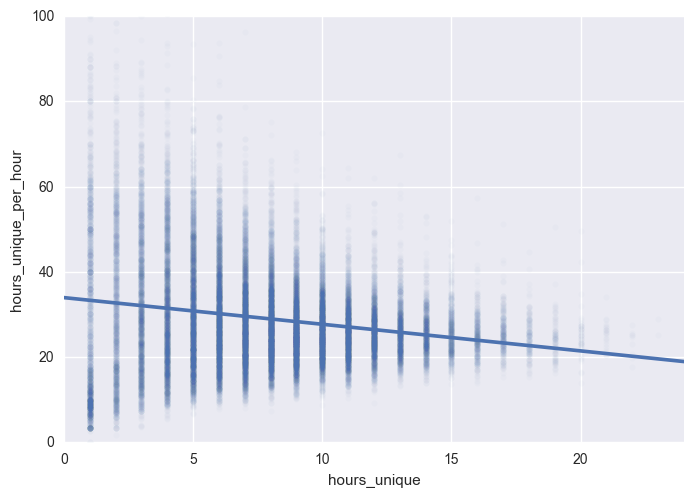

In [114]:
sns.regplot(x=df_agg.hours_unique, y=df_agg.hours_unique_per_hour, n_boot=1, scatter_kws={'alpha': 0.02}, x_bins=None)
plt.xlim((0, 24))
plt.ylim((0, 100))

(0, 100)

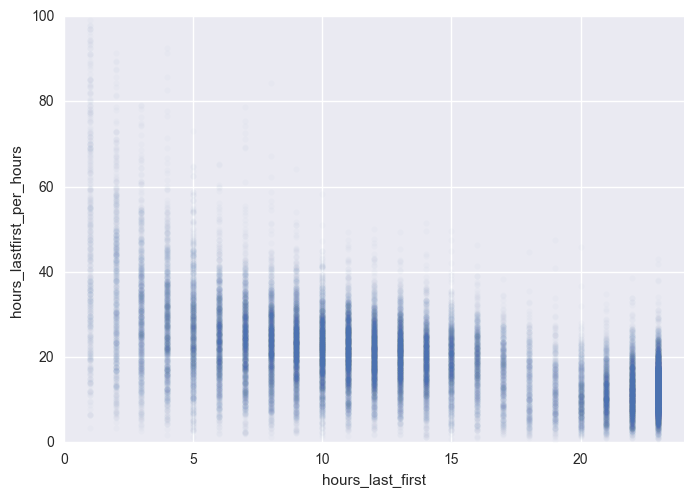

In [117]:
sns.regplot(x=df_agg.hours_last_first, y=df_agg.hours_lastfirst_per_hours, n_boot=1, scatter_kws={'alpha': 0.02})
plt.xlim((0, 24))
plt.ylim((0, 100))

(0, 100)

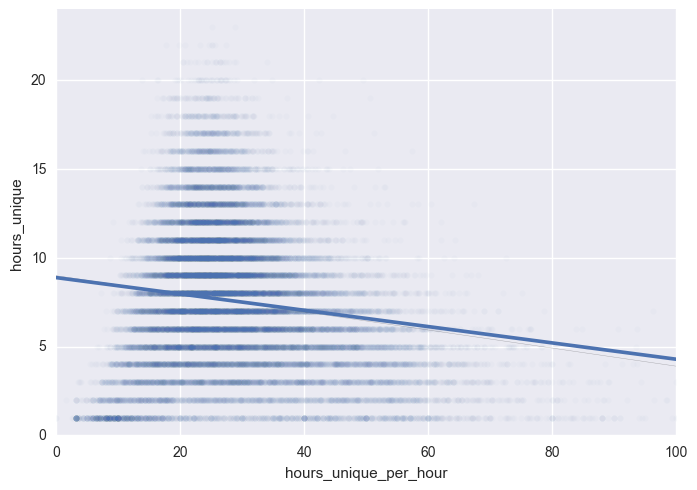

In [115]:
sns.regplot(y=df_agg.hours_unique, x=df_agg.hours_unique_per_hour, n_boot=1, scatter_kws={'alpha': 0.02})
plt.ylim((0, 24))
plt.xlim((0, 100))

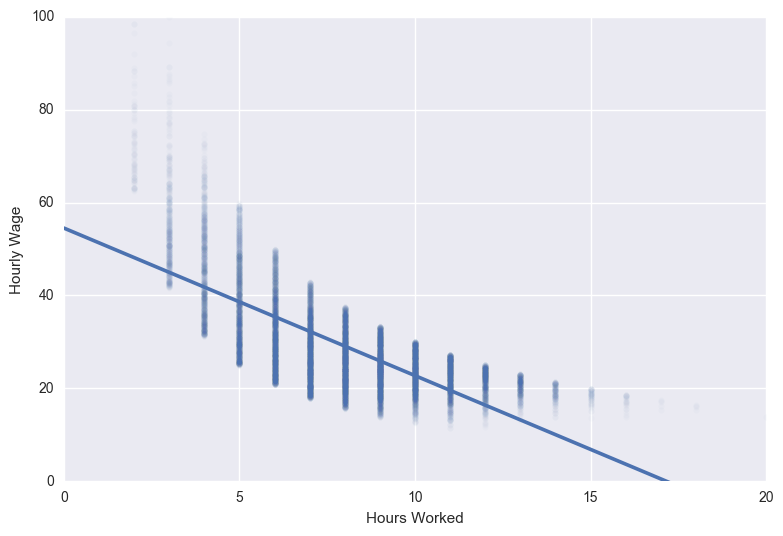

In [127]:
thalercurve = sns.regplot(x=df_agg2.hours_unique, y=df_agg2.hours_unique_per_hour, n_boot=1, scatter_kws={'alpha': 0.02}, x_bins=None)
plt.xlim((0, 20))
plt.xlabel("Hours Worked")
plt.ylim((0, 100))
plt.ylabel("Hourly Wage")
plt.tight_layout()

In [128]:
thalercurve.get_figure().savefig('thalercurve.png')

In [125]:
regress2 = ols('hours_unique_per_hour ~ hours_unique', df_agg2).fit()
print(regress2.summary())

                              OLS Regression Results                             
Dep. Variable:     hours_unique_per_hour   R-squared:                       0.449
Model:                               OLS   Adj. R-squared:                  0.449
Method:                    Least Squares   F-statistic:                 1.265e+04
Date:                   Sun, 12 Mar 2017   Prob (F-statistic):               0.00
Time:                           22:14:29   Log-Likelihood:                -56542.
No. Observations:                  15549   AIC:                         1.131e+05
Df Residuals:                      15547   BIC:                         1.131e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       54

In [126]:
regress3 = ols('hours_unique ~ hours_unique_per_hour', df_agg2).fit()
print(regress3.summary())

                            OLS Regression Results                            
Dep. Variable:           hours_unique   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Sun, 12 Mar 2017   Prob (F-statistic):               0.00
Time:                        22:15:02   Log-Likelihood:                -32348.
No. Observations:               15549   AIC:                         6.470e+04
Df Residuals:                   15547   BIC:                         6.472e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                11.97

In [38]:
df[['taxi_id', 'b_date', 'trip_total']].groupby(by=['taxi_id', 'b_date']).agg(sum).describe()

,trip_total
count,29432.000000
mean,210.773579
std,117.624625
min,0.010000
25%,122.725000
50%,203.500000
75%,286.057500
max,1032.640000


In [121]:
df.groupby(by='taxi_id').size().head()

taxi_id
1     40
2    109
4      5
5     45
8    120
dtype: int64

In [20]:
df.trip_total.groupby(by=df.taxi_id).describe()

taxi_id       
1        count     40.000000
         mean      29.547250
         std       22.188419
         min        6.560000
         25%        9.470000
         50%       16.425000
         75%       51.887500
         max       64.800000
2        count    109.000000
         mean      14.557339
         std       13.738097
         min        3.250000
         25%        7.500000
         50%       10.000000
         75%       14.100000
         max       85.000000
4        count      5.000000
         mean      15.250000
         std       10.583005
         min        5.000000
         25%       10.000000
         50%       10.500000
         75%       18.750000
         max       32.000000
5        count     45.000000
         mean      14.079333
         std       11.124100
         min        4.000000
         25%        7.800000
         50%       10.200000
                     ...    
8769     std        9.679759
         min        4.500000
         25%        7.062500

In [15]:
df.groupby(by=['taxi_id', df.trip_start.dt.date]).size()

taxi_id  trip_start
1        2016-01-17     3
         2016-01-18     4
         2016-01-19     7
         2016-01-20     9
         2016-01-21     6
         2016-01-22     7
         2016-01-23     4
2        2016-01-17    20
         2016-01-18     1
         2016-01-19     9
         2016-01-20    25
         2016-01-21    20
         2016-01-22    15
         2016-01-23    19
4        2016-01-19     3
         2016-01-21     1
         2016-01-22     1
5        2016-01-17    12
         2016-01-18     8
         2016-01-19     2
         2016-01-20     6
         2016-01-21     5
         2016-01-22     9
         2016-01-23     3
8        2016-01-17    22
         2016-01-18     1
         2016-01-19    12
         2016-01-20    23
         2016-01-21    16
         2016-01-22    21
                       ..
8766     2016-01-21     6
         2016-01-22    22
         2016-01-23    15
8769     2016-01-17    11
         2016-01-18     4
         2016-01-19    14
         2016-01-2